<a href="https://colab.research.google.com/github/Esbern/Python-for-Planners/blob/main/Data_Science_Using_Pandas_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Variable Notes
   - **PassengerId** Unique ID of the passenger

   - **Survived** Survived (1) or died (0)

   - **Pclass** Passenger's class (1st, 2nd, or 3rd)

   - **Name** Passenger's name

   - **Sex** Passenger's sex

   - **Age** Passenger's age

   - **SibSp** Number of siblings/spouses aboard the Titanic

   - **Parch** Number of parents/children aboard the Titanic

   - **Ticket** Ticket number

   - **Fare** Fare paid for ticket

   - **Cabin** Cabin number

   - **Embarked** Where the passenger got on the ship (C - Cherbourg, S - Southampton, Q = Queenstown)

In [1]:
import pandas as pd

In [3]:
url = "https://raw.githubusercontent.com/Esbern/Python-for-Planners/main/data/titanic.csv"
titanic_df = pd.read_csv(url)


## Describing the data
****

In [4]:
# Exploring the data using pandas methods : 'shape', 'info', 'describe', 'dtype', 'mean()', ...
print(f"DataFrame shape : {titanic_df.shape}\n================================")
print(f"DataFrame info : {titanic_df.info()}\n=================================")
print(f"DataFrame columns : {titanic_df.columns}\n=================================")
print(f"The type of each column : {titanic_df.dtypes}\n=================================")
print(f"How much missing value in every column : {titanic_df.isna().sum()}\n=================================")


DataFrame shape : (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
DataFrame info : None
DataFrame columns : Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
The type of each colu

In [5]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# The entier tabele can be printet as a html file
titanic_df.to_html('temp.html')

All good data analysis projects begin with trying to answer questions. Now that we know what column category data we have let's think of some questions or insights we would like to obtain from the data. So here's a list of questions we'll try to answer using our data analysis skills!

First some basic questions:

    1.) Who were the passengers on the Titanic? (Ages, Gender, Class,..etc)
    2.) What deck were the passengers on and how does that relate to their class?
    3.) Where did the passengers come from?
    4.) Who was alone and who was with family?
    
Then we'll dig deeper, with a broader question:

    5.) What factors helped someone survive the sinking?

# 1. Who were the passengers on the titanic?

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("fivethirtyeight")

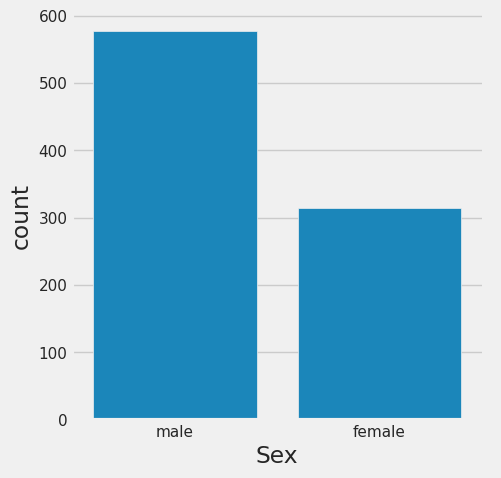

In [11]:
# Let's first check gender
# 'catplot()': Figure-level interface for drawing categorical plots onto a FacetGrid.
sns.catplot(x='Sex', data=titanic_df, kind='count')

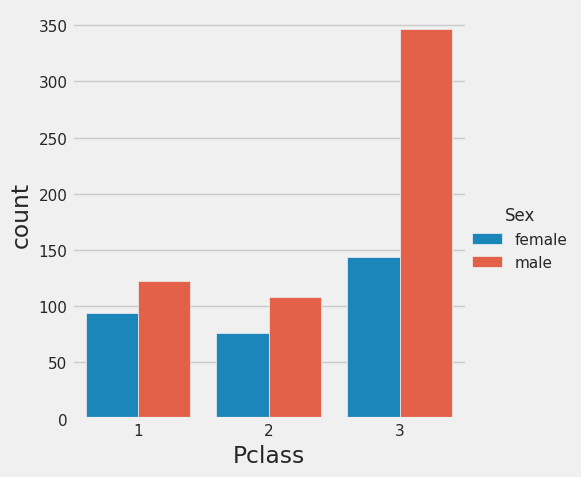

In [73]:
# Now let separate the gender by classes passing 'Sex' to the 'hue' parameter
sns.catplot(x='Pclass', data=titanic_df, hue='Sex', kind='count')

Wow, quite a few more males in the 3rd class than females, an interesting find. However, it might be useful to know the split between males, females, and children. How can we go about this?

In [12]:
# create new coloumn
titanic_df['Person'] = titanic_df.Sex
titanic_df.Person.unique()


array(['male', 'female'], dtype=object)

### filtering the dataset using .loc

In [55]:
titanic_df.loc[(titanic_df['Age']>60) & (titanic_df['Sex']== "male")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S,male
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C,male
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,male
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,male
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S,male
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S,male
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q,male
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S,male
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,male
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S,male


In [14]:
titanic_df.loc[titanic_df['Age'] < 16, 'Person'] = 'Child'
titanic_df.Person.unique()

array(['male', 'female', 'Child'], dtype=object)

In [15]:
# It all in one cell: Create a new column 'Person' in which every person under 16 is child.

titanic_df['Person'] = titanic_df.Sex
titanic_df.loc[titanic_df['Age'] < 16, 'Person'] = 'Child'

In [16]:
# Checking the distribution
print(f"Person categories : {titanic_df.Person.unique()}\n=================================")
print(f"Distribution of person : {titanic_df.Person.value_counts()}\n=================================")
print(f"Mean age : {titanic_df.Age.mean()}\n=================================")

Person categories : ['male' 'female' 'Child']
Distribution of person : Person
male      537
female    271
Child      83
Name: count, dtype: int64
Mean age : 29.69911764705882


Excellent! Now we have seperated the passengers between female, male, and child. This will be important later on beacuse of the famous **"Women and children first policy"**!

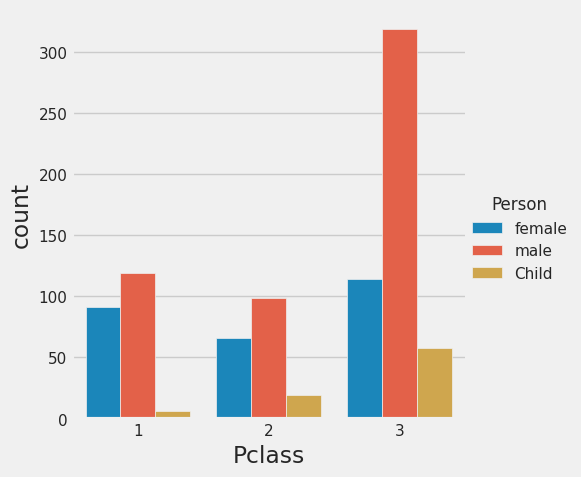

In [17]:
sns.catplot(x='Pclass', data=titanic_df, hue='Person', kind='count')

Interesting, quite a bit of children in 3rd class and not so many in 1st! How about we create a distribution of the ages to get a more precise picture of the who the passengers were.

<Axes: >

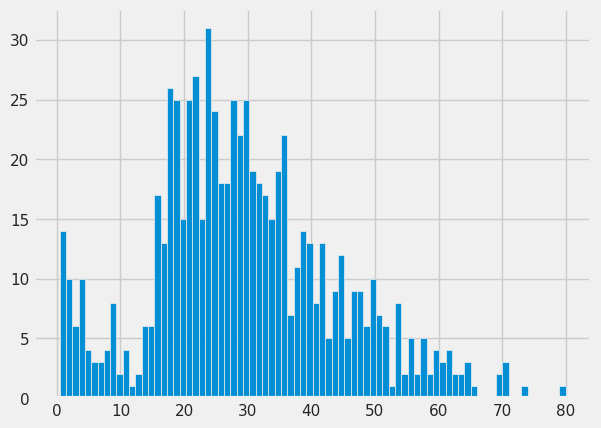

In [21]:
# visualizing age distribution
titanic_df.Age.hist(bins=80)

### We can compare the age distribution of male and female using a FacetGrid for the plots

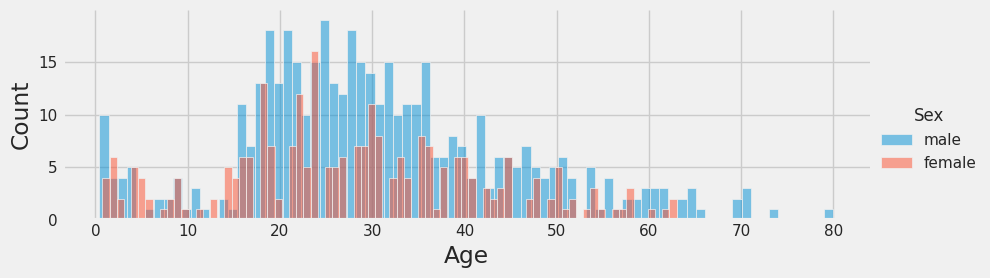

In [37]:
fig = sns.FacetGrid(titanic_df, hue="Sex", aspect=3)
fig.map(sns.histplot, 'Age', bins=80, alpha=0.5)
fig.add_legend()

### We can "smoothhe" out the distribution using a Kernal Density Estimate (KDE)

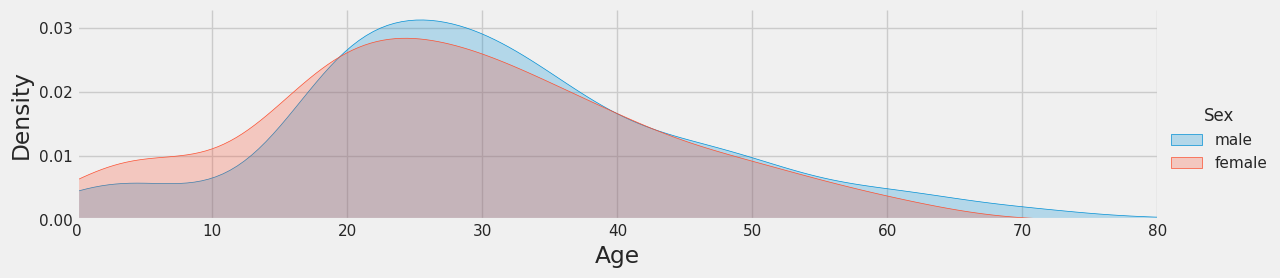

In [39]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

fig = sns.FacetGrid(titanic_df, hue="Sex", aspect=4)
fig.map(sns.kdeplot, 'Age', fill=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0, oldest))

fig.add_legend()

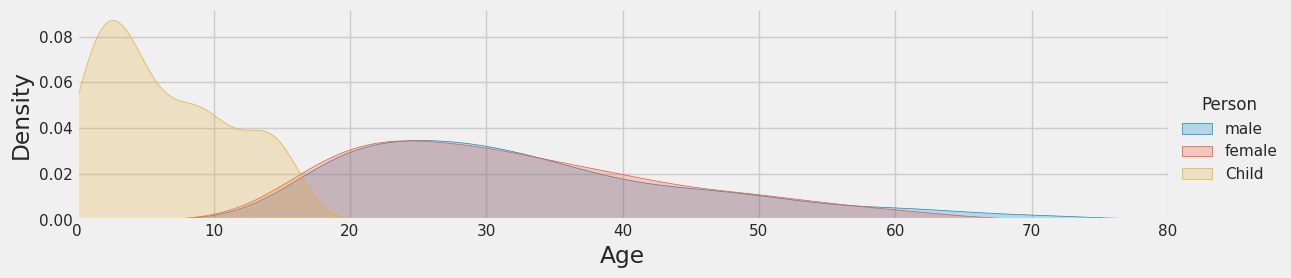

In [41]:
# We could have done the same thing for the 'person' column to include children:

fig = sns.FacetGrid(titanic_df, hue="Person",aspect=4)
fig.map(sns.kdeplot, 'Age', fill=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0, oldest))

fig.add_legend()

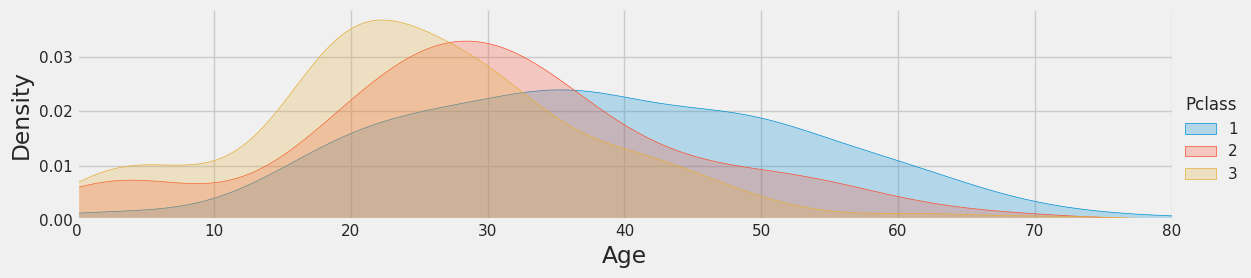

In [43]:
# Let's do the same for class by changing the hue argument:

fig = sns.FacetGrid(titanic_df, hue="Pclass",aspect=4)
fig.map(sns.kdeplot, 'Age', fill=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0, oldest))

fig.add_legend()

We've gotten a pretty good picture of who the passengers were based on Sex, Age, and Class. So let's move on to our 2nd question: What deck were the passengers on and how does that relate to their class?

# 2. What deck were the passengers on and how does that relate to their class?

In [44]:
# visualizing the dataset again
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


So we can see that the Cabin column has information on the deck, but it has several NaN values, so we'll have to drop them.

In [45]:
# First we'll drop the NaN values and create a new object, deck
deck = titanic_df['Cabin'].dropna()
deck

,Cabin
1,C85
3,C123
6,E46
10,G6
11,C103
...,...
871,D35
872,B51 B53 B55
879,C50
887,B42


pandas.core.series.Series

Notice we only need the first letter of the deck to classify its level (e.g. A, B, C, D, E, F, G)

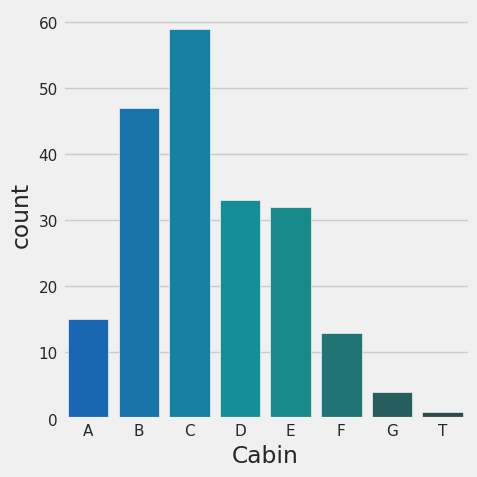

In [50]:
# let's grab that letter for the deck level with a simple for loop
levels = []
for level in deck:
    levels.append(level[0])

cabin_df = pd.DataFrame(levels)
cabin_df.columns = ['Cabin']
cabin_df.sort_values(by='Cabin', inplace=True)
sns.catplot(x='Cabin', data=cabin_df, kind='count', hue='Cabin' , legend=False, palette='winter_d')

Interesting to note we have a 'T' deck value there which doesn't make sense, we  can drop it out with the following code:

In [ ]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.catplot(x='Cabin', data=cabin_df, kind='count', palette='summer')

Great now that we've analyzed the distribution by decks, let's go ahead and answer our third question.

# 3. Where did the passengers come from?

In [53]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


Note here that the Embarked column has C, Q, and S values. Reading about the project on Kaggle you'll note that these stand for Cherbourg, Queenstown, Southhampton.

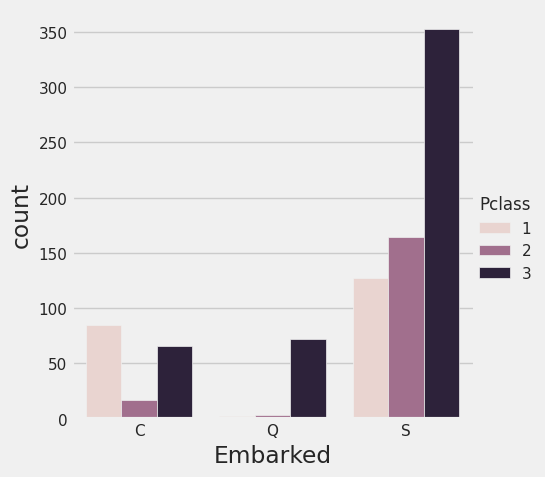

In [54]:
# Now we can make a quick factorplot to check out the results, note the
# order argument, used to deal with NaN values

sns.catplot(x='Embarked', data=titanic_df, hue='Pclass', kind='count', order=['C', 'Q', 'S'])

An interesting find here is that in Queenstown, almost all the passengers that boarded there were 3rd class. It would be intersting to look at the economics of that town in that time period for further investigation.

# 4. Who was alone and who was with family?

In [ ]:
titanic_df.head()

In [55]:
# Let's start by adding a new column to define alone
# We'll add the parent/child column with the sibsp column

titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch
titanic_df.Alone

,Alone
0,1
1,1
2,0
3,1
4,0
...,...
886,0
887,0
888,3
889,0


Now we know that if the Alone column is anything but 0, then the passenger had family aboard and wasn't alone. So let's change the column now so that if the value is greater than 0, we know the passenger was with his/her family, otherwise they were alone.

In [56]:
# Look for > 0 or == 0 to set alone status
titanic_df.loc[titanic_df['Alone'] > 0, 'Alone'] = 'with Family'
titanic_df.loc[titanic_df['Alone'] == 0, 'Alone'] = 'Alone'

<ipython-input-56-47f945c6bb72>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'with Family' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  titanic_df.loc[titanic_df['Alone'] > 0, 'Alone'] = 'with Family'


In [57]:
# Let's check to make sure it worked
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,with Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


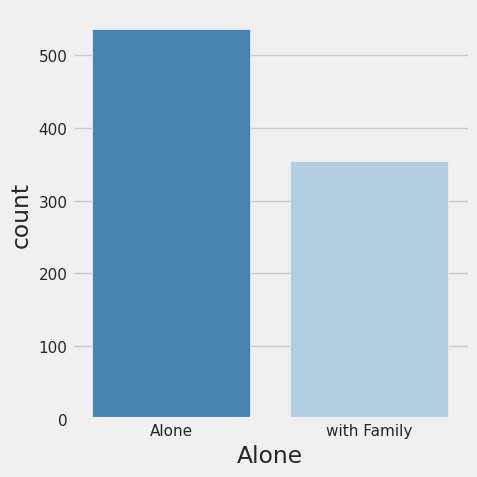

In [60]:
# Now let's get a simple visualization!
sns.catplot(x='Alone', data=titanic_df, kind='count', hue = 'Alone',  palette='Blues',
            order=['Alone', 'with Family'])

Great work! Now that we've throughly analyzed the data let's go ahead and take a look at the most interesting (and open-ended) question: *What factors helped someone survive the sinking?*

# 5. What factors helped someone survive the sinking?

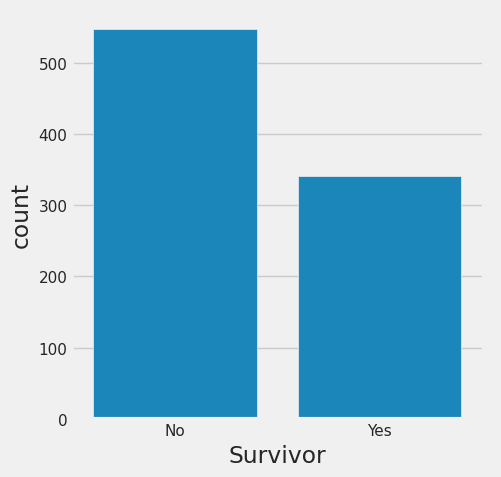

In [61]:
# Let's start by creating a new column for legibility purposes through mapping
titanic_df['Survivor'] = titanic_df.Survived.map({0:'No', 1:'Yes'})

# Let's just get a quick overall view of survied vs died.
sns.catplot(x='Survivor', data=titanic_df, kind='count')

So quite a few more people died than those who survived. Let's see if the class of the passengers had an effect on their survival rate, since the movie Titanic popularized the notion that the 3rd class passengers did not do as well as their 1st and 2nd class counterparts.

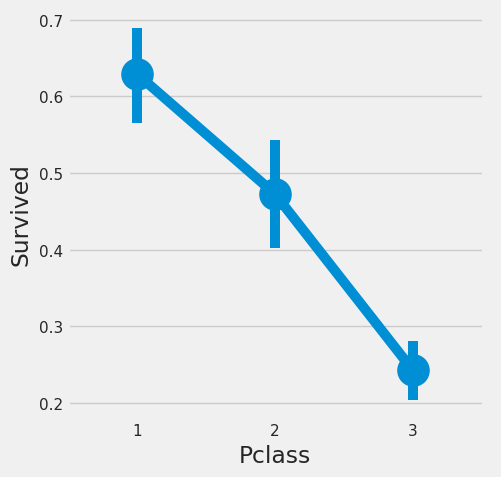

In [64]:
# Let's use a factor plot again, but now considering class
sns.catplot(x='Pclass', y='Survived', data=titanic_df, kind='point')

Look like survival rates for the 3rd class are substantially lower! But maybe this effect is being caused by the large amount of men in the 3rd class in combination with the women and children first policy. Let's use 'hue' to get a clearer picture on this.

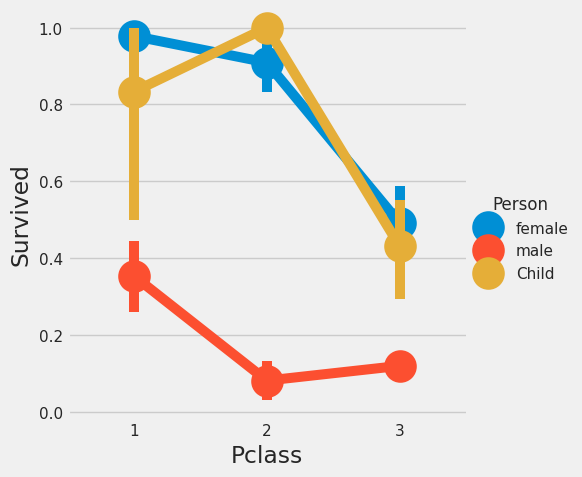

In [65]:
# Let's use a factor plot again, but now considering class and gender
sns.catplot(x='Pclass', y='Survived', data=titanic_df, hue='Person', kind='point')

From this data it looks like being a male or being in 3rd class were both not favourable for survival. Even regardless of class the result of being a male in any class dramatically decreases your chances of survival.

But what about age? Did being younger or older have an effect on survival rate?

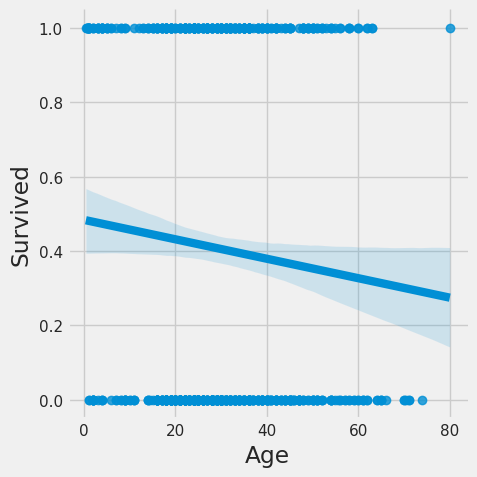

In [66]:
# Let's use a linear plot on age versus survival
sns.lmplot(x='Age', y='Survived', data=titanic_df)

Looks like there is a general trend that the older the passenger was, the less likely they survived. Let's go ahead and use hue to take a look at the effect of class and age.

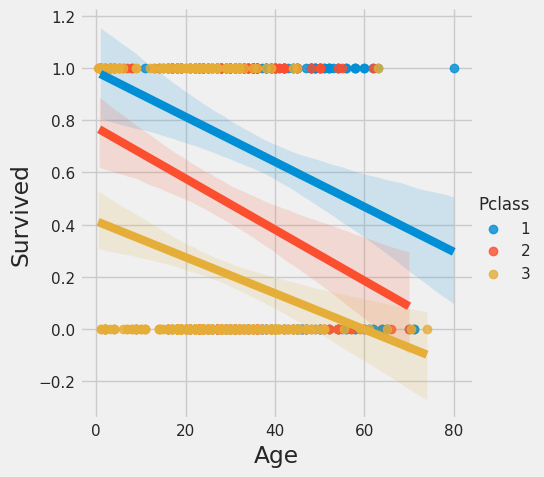

In [67]:
# Let's use a linear plot on age versus survival using hue for class seperation
sns.lmplot(x='Age', y='Survived',hue='Pclass', data=titanic_df)

We can also use the x_bin argument to clean up this figure and grab the data and bin it by age with a std attached!

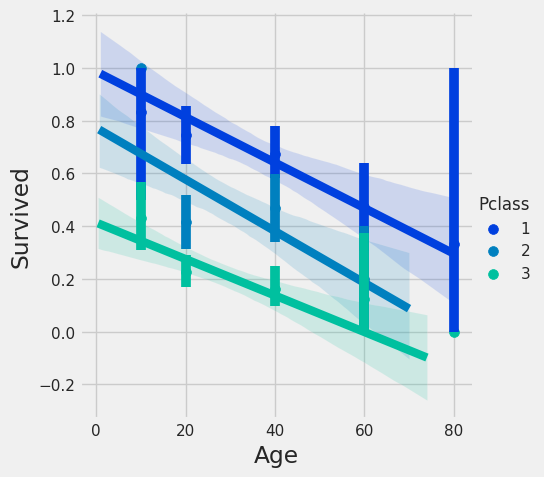

In [72]:
# Let's use a linear plot on age versus survival using hue for class seperation
generations = [10, 20, 40, 60, 80]
sns.lmplot(x='Age', y='Survived', hue='Pclass', data=titanic_df, palette='winter', x_bins=generations)

Interesting find on the older 1st class passengers! What about if we relate gender and age with the survival set?

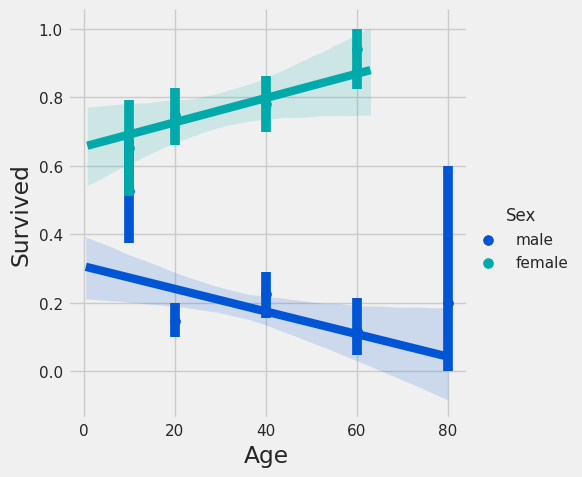

In [73]:
sns.lmplot(x='Age', y='Survived', hue='Sex', data=titanic_df, palette='winter', x_bins=generations)

Awesome! we've gotten some really great insights on how gender,age, and class all related to a passengers chance of survival. Now you take control: Answer the following question using pandas and seaborn:


    Did having a family member increase the odds of surviving the crash?

## References:
- [Jose Portilla Udemy Course: Learning Python for Data Analysis and Visualization](https://www.udemy.com/course/learning-python-for-data-analysis-and-visualization/)